In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [118]:
df = pd.read_csv("homeprices.csv")

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
area     5 non-null int64
price    5 non-null int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [120]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


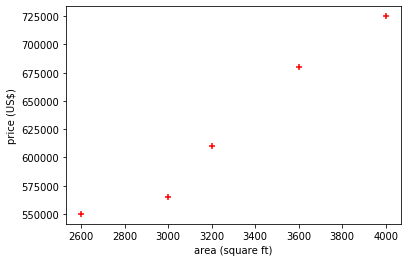

In [121]:
plt.xlabel("area (square ft)")
plt.ylabel("price (US$)")
plt.scatter(df.area,df.price,color="red",marker="+")

In [122]:
model = linear_model.LinearRegression()

In [123]:
type(model)

sklearn.linear_model.base.LinearRegression

In [124]:
df[["area"]].values.ndim

2

In [125]:
df[["price"]].values.ndim

2

In [126]:
model.fit(df[["area"]].values, df[["price"]].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
model.coef_

array([[135.78767123]])

In [128]:
model.intercept_

array([180616.43835616])

In [129]:
type(np.array([[3300]]))

numpy.ndarray

In [130]:
np.array([[3300]]).ndim

2

In [131]:
np.array([[3300]]).shape

(1, 1)

In [132]:
model.predict(np.array([[3300]]))

array([[628715.75342466]])

In [133]:
# y=mx+b
(135.78767123*3300)+180616.43835616

628715.75341516

In [134]:
areas_dataframe = pd.read_csv("areas.csv")

In [135]:
areas_dataframe.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [136]:
type(areas_dataframe.values)

numpy.ndarray

In [137]:
prices = model.predict(areas_dataframe.values)

In [138]:
type(prices)

numpy.ndarray

In [139]:
areas_dataframe["price"] = prices

In [140]:
areas_dataframe.head()

,area,price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [141]:
areas_dataframe.to_csv("predictions.csv", index=False)

In [142]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


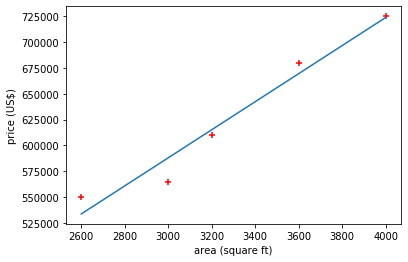

In [148]:
%matplotlib inline
plt.xlabel("area (square ft)")
plt.ylabel("price (US$)")
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df[["area"]].values,model.predict(df[["area"]].values))